In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#MNIST dataset
###The MNIST database(Modified National Institute of Standards and Technology database) of handwritten digits consists of a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. Additionally, the black and white images from NIST were size-normalized and centered to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels. 


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
mnist_train= pd.read_csv(io.BytesIO(uploaded['mnist_train.csv']),header=None)
mnist_train.head(2)

In [ ]:
#Load test data from local drive
from google.colab import files
uploaded = files.upload()
import io
mnist_test= pd.read_csv(io.BytesIO(uploaded['mnist_test.csv']),header=None)
mnist_test.head(2)

Saving mnist_test.csv to mnist_test.csv


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(mnist_train)
m, n = data.shape
data_train = data.T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.

data = np.array(mnist_test)
m, n = data.shape
data_test = data.T
y_test = data_test[0]
x_test = data_test[1:n]
x_test = x_test / 255.
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(784, 60000) (60000,) (784, 10000) (10000,)


5


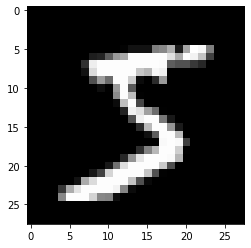

In [ ]:
ind=0
image = x_train[:,ind]
image = image.reshape((28, 28))*255
#plt.gray()
plt.imshow(image, interpolation='nearest')
print(y_train[ind])
plt.show()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

###The MNIST dataset is used by researchers to test and compare their research results with others. The lowest error rates in literature are as low as 0.21 percent.

In [ ]:
def init_params(): # Initialize the parameters, the weights and biase
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)
def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def back_prop(Z1, A1, Z2, A2, W1, W2,b1,b2, X, Y,alpha):
    
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y

    dA2=W2.T.dot(dZ2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    

    dZ1 = dA2 * ReLU_deriv(Z1)

    dA1=W1.T.dot(dZ1) #Unused- Not propagating back because we are at the input layer
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1  

    return W1, b1, W2, b2

In [ ]:
def get_truth(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def train(X, Y, alpha, epoch):
    W1, b1, W2, b2 = init_params()
    for i in range(epoch):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        W1, b1, W2, b2 = back_prop(Z1, A1, Z2, A2, W1, W2,b1,b2, X, Y,alpha)
        if i % 10 == 0:
            print("Epoch: ", i)
            predictions = get_truth(A2)
            print(predictions, Y)
            print("fitting:",get_accuracy(predictions, Y)*100,"%")
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = train(x_train, y_train, 0.10, 1000)

Epoch:  0
[9 9 9 ... 9 9 9] [5 0 4 ... 5 6 8]
fitting: 12.088333333333333 %
Epoch:  10
[5 0 9 ... 5 6 0] [5 0 4 ... 5 6 8]
fitting: 51.71666666666667 %
Epoch:  20
[5 0 4 ... 8 6 8] [5 0 4 ... 5 6 8]
fitting: 74.79666666666667 %
Epoch:  30
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 74.85666666666667 %
Epoch:  40
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 73.87833333333333 %
Epoch:  50
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 80.85166666666666 %
Epoch:  60
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 85.095 %
Epoch:  70
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 85.44 %
Epoch:  80
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 87.03 %
Epoch:  90
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 88.02833333333334 %
Epoch:  100
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 88.52 %
Epoch:  110
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 89.59 %
Epoch:  120
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 87.48 %
Epoch:  130
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
fitting: 90.53999999999999 %
Epo

In [ ]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_truth(A2)
    return predictions

def show_prediction(index, W1, b1, W2, b2):
    current_image = x_test[:, index, None]
    prediction = predict(x_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Actual Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Actual Label:  9


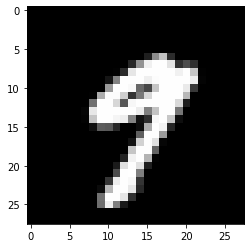

Prediction:  [6]
Actual Label:  6


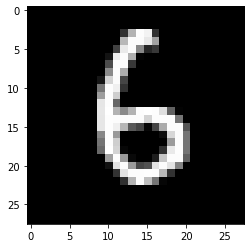

Prediction:  [6]
Actual Label:  6


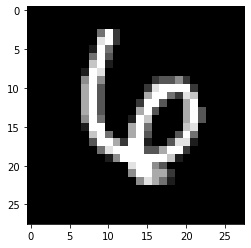

Prediction:  [5]
Actual Label:  5


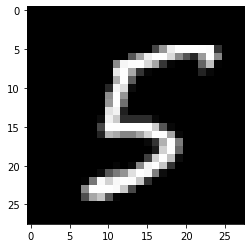

Prediction:  [4]
Actual Label:  4


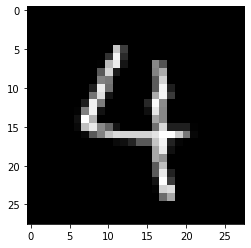

Prediction:  [0]
Actual Label:  0


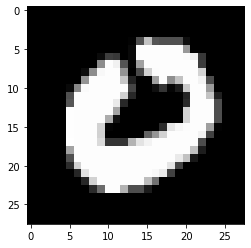

Prediction:  [7]
Actual Label:  7


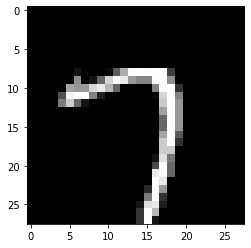

Prediction:  [4]
Actual Label:  4


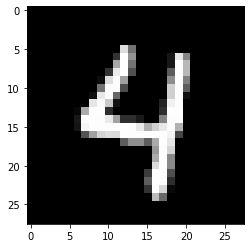

Prediction:  [0]
Actual Label:  0


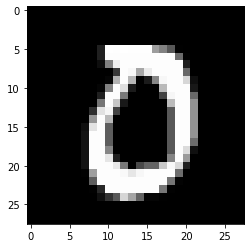

Prediction:  [1]
Actual Label:  1


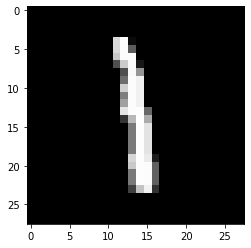

In [ ]:
for i in range(20,30):
  show_prediction(i, W1, b1, W2, b2)

In [ ]:
def test(X, Y, W1, b1, W2, b2):
  Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_truth(A2)
  print(predictions, Y)
  print("fitting:",get_accuracy(predictions, Y)*100,"%")

In [ ]:
test(x_test,y_test,W1,b1,W2,b2)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
fitting: 88.27000000000001 %
